In [1]:
from utilities import get_stats
from utilities import find_means_neighbors

from sklearn.mixture import GaussianMixture
from mnist_loader import gather_data
import matplotlib.pyplot as plt
from random import shuffle
from kmeans import KMeans
from gmm import GMM
import numpy as np
import statistics
import os

# Load images
First, we will load all of the MNIST images using the MNIST python library. This will return a multidimensional array of shape (Number of samples x Width x Height). There are 60,000 training images and 10,000 test images.

Each input image will be flattened so that instead of being 28 x 28, it will be 1 x 784. This leaves a training array size of (60000, 728).

We will class-balance the inputs, so that each number is equally represented in the dataset. This prevents the clustering algorithm to be biased towards numbers which are more frequent in the training set.

In [2]:
data = gather_data('testing', os.getcwd())
features = np.array(list(map(lambda x: x['img'], data)))
actual = list(map(lambda x: x['label'], data))

antimode:  5
min:  892


# Train K-Means
First we will train a K-means classifier on the dataset, with 10 clusters inside it. Ideally, the clusters in this classifier will group the 10 different digits into clusters together.

In [3]:
kmeans = KMeans(10)
kmeans.fit(features)

# Train GMM
Now let's train the Gaussian Mixture Model. We will use a mixture with 10 gaussians inside. The hope is that they cluster each of the training examples with digits of the same kind.

In [4]:
gmm = GaussianMixture(10)
gmm.fit(features)

GaussianMixture(n_components=10)

# Measuring Accuracy 
Our Gaussian Mixture model doesn't actually know which number is which. They are simply clustering images together based on their internal similarity. The clustering process doesn't actually take into account the actual labels for the images. However, we do know the labels, so we can use this information to measure the accuracy of the clustering process.

For each cluster, we find the most common label of all examples in that cluster. This will be the label of that cluster. Then we find the proportion of images whose label matches their cluster label. That's the accuracy.

In [5]:
kmeans_predictions = kmeans.predict(features)
kmeans_ami, kmeans_acc = get_stats(kmeans_predictions, actual)
gmm_predictions = gmm.predict(features)
gmm_ami, gmm_acc = get_stats(gmm_predictions, actual)
print('kmeans adjusted mutual info: ', kmeans_ami)
print('kmeans accuracy: ', kmeans_acc)
print('gmm adjusted mutual info: ', gmm_ami)
print('gmm accuracy: ', gmm_acc)

kmeans adjusted mutual info:  0.5435767447730703
kmeans accuracy:  0.6325112107623319
gmm adjusted mutual info:  0.5436941112530033
gmm accuracy:  0.6208520179372198


# Visualizations
Visualizing examples within each cluster can help us understand what our clustering algorithms have learned. Here we will visualize clusters in two ways: 

1. find the mean of all examples belonging to a cluster
2. find the example nearest to the mean of the cluster

For the Gaussian Mixture Model we will perform both of these visualization techniques on all 10 clusters.

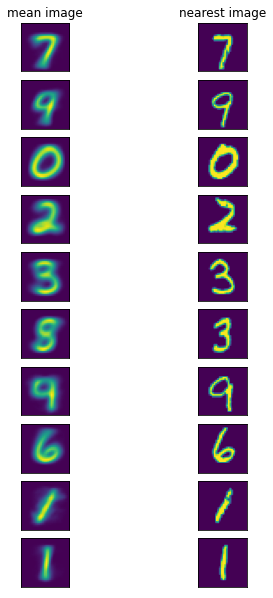

In [6]:
means, nns = find_means_neighbors(gmm_predictions, features)
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10,30))
plt.tight_layout()
fig.set_size_inches(5, 8)

axes[0, 0].set_title('mean image')
axes[0, 1].set_title('nearest image')

for index, (ax1, ax2) in enumerate(axes):
    ax1.imshow(means[index].reshape(28, 28))
    ax2.imshow(nns[index].reshape(28, 28))
    ax1.get_xaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

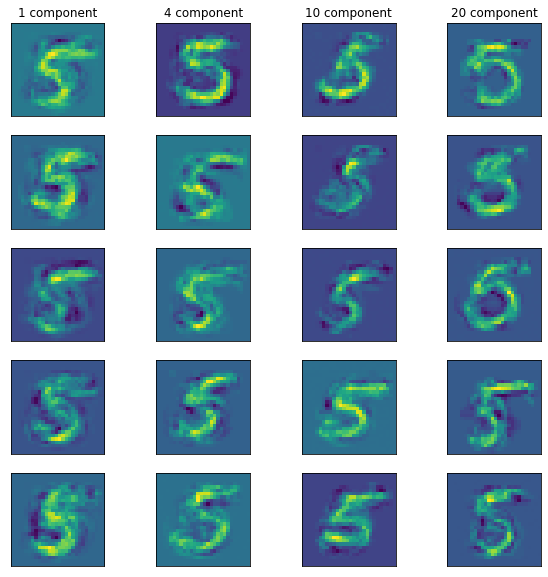

In [7]:
single_digit = list(map(lambda y: y['img'], filter(lambda x: x['label'] == 5, data)))

gmm1 = GaussianMixture(1)
gmm4 = GaussianMixture(4)
gmm10 = GaussianMixture(10)
gmm20 = GaussianMixture(20)

models = list(map(lambda x: GaussianMixture(x), [1, 4, 10, 20]))
samples = []

for m in models:
    m.fit(single_digit)
    m_samples = m.sample(n_samples=5)
    samples.append(m_samples[0])
    
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10,10))

for i, x in enumerate([1, 4, 10, 20]):
    axes[0, i].set_title('{0} component'.format(x))

for index, (ax1, ax2, ax3, ax4) in enumerate(axes):
    for i, ax in enumerate([ax1, ax2, ax3, ax4]):
        ax.imshow(samples[i][index].reshape((28,28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)